In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating project at `~/Desktop/Summer_2025/LearningToControlClass/class02`


# The content of this notebook comes from the CMU course "Optimal-Control-16-745" from Zachary Manchester:

https://github.com/Optimal-Control-16-745/lecture-notebooks/blob/main/Lecture%204/equality-constraints.ipynb

In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
Q = Diagonal([0.5; 1])
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end
function ∇f(x)
    return Q*(x-[1; 0])
end
function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [4]:
function c(x)
    return x[1]^2 + 2*x[1] - x[2]
end
function ∂c(x)
    return [2*x[1]+2 -1]
end

∂c (generic function with 1 method)

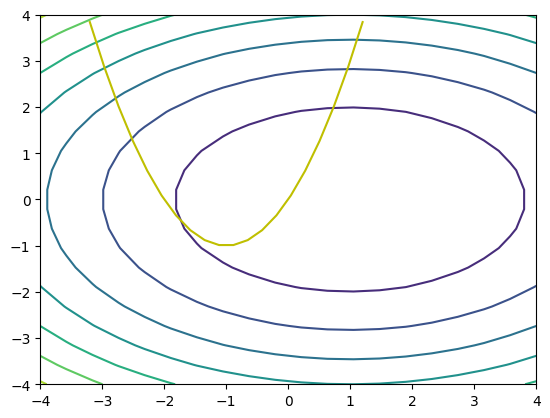

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14a88c250>

In [5]:
function plot_landscape()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp),LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)',LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp,Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    contour(Xsamp,Ysamp,Zsamp)

    xc = LinRange(-3.2,1.2,Nsamp)
    plot(xc,xc.^2+2.0.*xc,"y")
end

plot_landscape()

In [6]:
function newton_step(x0,λ0)
    # Computing the hessian of the lagrangian
    H = ∇2f(x0) + ForwardDiff.jacobian(x -> ∂c(x)'*λ0, x0)
    C = ∂c(x0)
    # Forming KKT system to solve
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    # Extracting solutions of KKT solve
    Δx = Δz[1:2]
    Δλ = Δz[3]
    # Applying update
    return x0+Δx, λ0+Δλ
end

newton_step (generic function with 1 method)

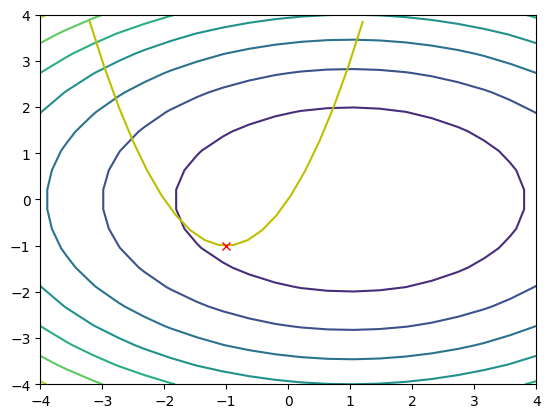

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14b72d8a0>

In [7]:
xguess = [-1; -1] 
# Note that we did not have to give an initial feasible guess which is really improtant for other applications in roobitics where we have nonlinear constraints on initial state which is already hard 
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

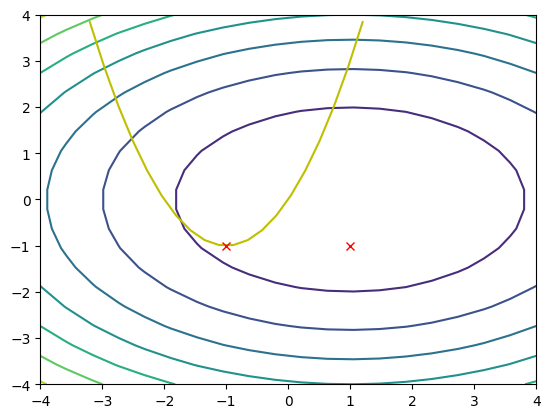

"Note no line search implemented, so may have overshot\n\nI am using a linearization of the nonconvex constraint, I am going to have to lie on the tangent line.\n\nI.e I moved towards the minimizer on the linearized constraint!\n"

In [8]:
xnew, λnew = newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")
"""
Note no line search implemented, so may have overshot

I am using a linearization of the nonconvex constraint, I am going to have to lie on the tangent line.

I.e I moved towards the minimizer on the linearized constraint!
"""

# Let's try again!

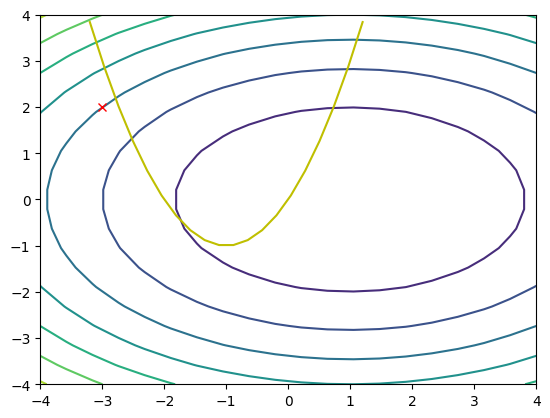

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x16854e290>

In [9]:
xguess = [-3; 2] 
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

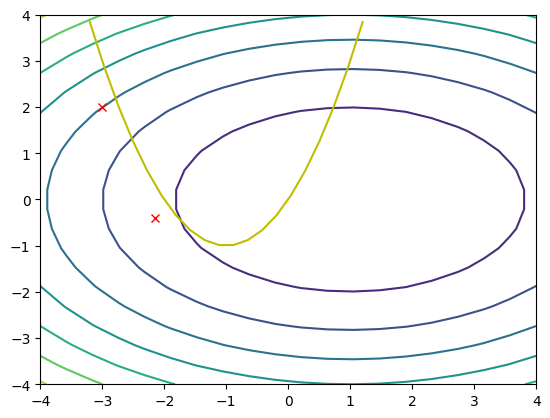

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1686a1540>

In [10]:
xnew, λnew = newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")

## What went wrong on this second starting point?

Stuck at infeasible spot and cannot move.

In [11]:
H = ∇2f(xguess[:,end]) + ForwardDiff.jacobian(x -> ∂c(x)'*λguess[end], xguess[:,end]) # Hessian of Lagrangian

2×2 Matrix{Float64}:
 -0.287879  0.0
  0.0       1.0

In [12]:
∇2f(xguess[:,end])
# Hessian of original objective. Recall we want this to postive definite. 
# However the hessian of the lagrangian is not PD, i.e it's indefinite
# Takeaway is need to regulaize as we did not have convex constraint or maybe just test out guass-newton??

2×2 Diagonal{Float64, Vector{Float64}}:
 0.5   ⋅ 
  ⋅   1.0

In [13]:
function gauss_newton_step(x0,λ0)
    H = ∇2f(x0)
    C = ∂c(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

gauss_newton_step (generic function with 1 method)

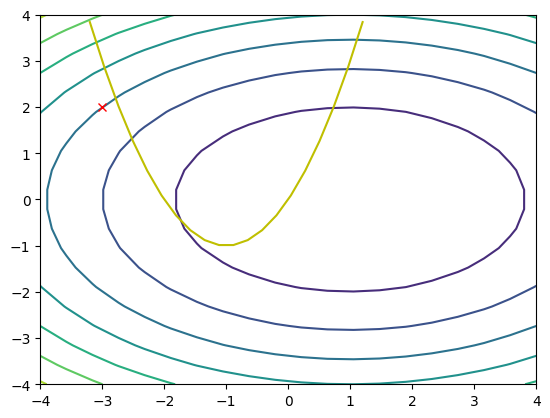

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x168717010>

In [14]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

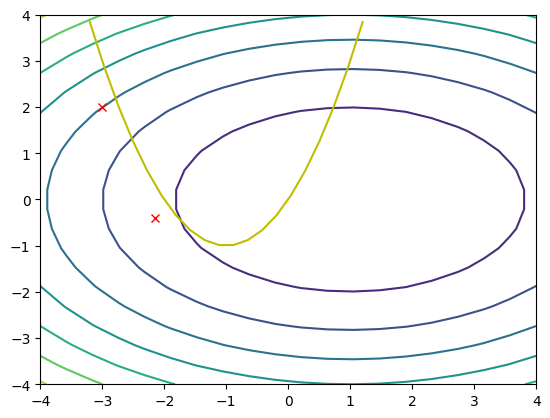

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x17e7151b0>

In [15]:
xnew, λnew = gauss_newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")